In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
nt = 50000
dt = 0.1
Nu = 0.12      # Holton pp 58
Ns = 0.012

In [4]:
def sens_subplots(var, ax, title):
    cs = ax.plot(var)
    ax.set_title(title)

### NLM

In [8]:
w = np.zeros(nt)
bu = np.zeros(nt)
bs = np.zeros(nt)
Hu = np.zeros(nt)
Hs = np.zeros(nt)

alpha = 0.01


#       w0d = 0.0001
#       w0 = 0.1
#       bs0d = 0.0001
#       bs0 = 0.1
#       bu0d = 0.0001
#       bu0 = 0.5
        
w[0] = 0.1
bu[0] = 0.1
bs[0] = 0
t = 0
if bs[t] < bu[t]:
    Hs[t] = 0
    Hu[t] = 1
    w[t+1] = w[t] + bu[t]*dt
else:
    Hs[t] = 1
    Hu[t] = 0
    w[t+1] = w[t] + bs[t]*dt

bu[t+1] = bu[t] - (Nu**2)*w[t]*dt
bs[t+1] = bs[t] - (Ns**2)*w[t]*dt
    
for t in range(1,nt-1):
    if bs[t] < bu[t]:
        Hs[t] = 0
        Hu[t] = 1
        w[t+1] = w[t-1] + bu[t]*dt*2
    else:
        Hs[t] = 1
        Hu[t] = 0
        w[t+1] = w[t-1] + bs[t]*dt*2
    
    bu[t+1] = bu[t-1] - (Nu**2)*w[t]*dt*2
    bs[t+1] = bs[t-1] - (Ns**2)*w[t]*dt*2
    
    
    bu[t] = bu[t] + alpha*(bu[t+1] - 2*bu[t] + bu[t-1])
    bs[t] = bs[t] + alpha*(bs[t+1] - 2*bs[t] + bs[t-1])
    w[t] = w[t] + alpha*(w[t+1] - 2*w[t] + w[t-1])


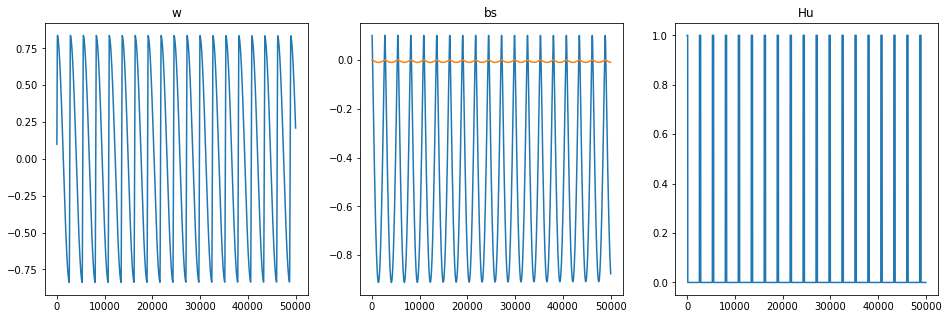

In [9]:
nrows = 1
ncols = 3
fig,ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16,5))
sens_subplots(w, ax[0], "w")
sens_subplots(bu, ax[1], "bu")
sens_subplots(bs, ax[1], "bs")
sens_subplots(Hu, ax[2], "Hu")

### TLM

In [18]:
nt = 50000
# basic state?
w = np.zeros(nt)
bu = np.zeros(nt)
bs = np.zeros(nt)

# p for prime, perturbation
wp = np.zeros(nt)
bup = np.zeros(nt)
bsp = np.zeros(nt)

# initial condition for basic state
w[0] = 0.1
bu[0] = 0.1
bs[0] = 0

# initial condition for perturbaitons are all zeros, 
wp[0] = 1e-4
bup[0] = 1e-4
bsp[0] = 1e-4
# no need to specify

t = 0
if bs[t] > bu[t]:
    wp[t+1] = wp[t] + dt*bsp[t]
    w[t+1] = w[t] + bs[t]*dt   
else:
    wp[t+1] = wp[t] + dt*bup[t]
    w[t+1] = w[t] + bu[t]*dt

bup[t+1] = bup[t-1] - (Nu**2)*wp[t]*dt
bu[t+1] = bu[t] - (Nu**2)*w[t]*dt
bsp[t+1] = bsp[t] - (Ns**2)*wp[t]*dt
bs[t+1] = bs[t] - (Ns**2)*w[t]*dt
    
    
for t in range(1, nt-1):
    if bs[t] > bu[t]:
        wp[t+1] = wp[t-1] + dt*bsp[t]*2
        w[t+1] = w[t-1] + bs[t]*dt*2
    else:
        wp[t+1] = wp[t-1] + dt*bup[t]*2
        w[t+1] = w[t-1] + bu[t]*dt*2
    
    bup[t+1] = bup[t-1] - (Nu**2)*wp[t]*dt*2
    bu[t+1] = bu[t-1] - (Nu**2)*w[t]*dt*2
    bsp[t+1] = bsp[t-1] - (Ns**2)*wp[t]*dt*2
    bs[t+1] = bs[t-1] - (Ns**2)*w[t]*dt*2

# # Asselin filter    
    bu[t] = bu[t] + alpha*(bu[t+1] - 2*bu[t] + bu[t-1])
    bs[t] = bs[t] + alpha*(bs[t+1] - 2*bs[t] + bs[t-1])
    w[t] = w[t] + alpha*(w[t+1] - 2*w[t] + w[t-1])
    
    bup[t] = bup[t] + alpha*(bup[t+1] - 2*bup[t] + bup[t-1])
    bsp[t] = bsp[t] + alpha*(bsp[t+1] - 2*bsp[t] + bsp[t-1])
    wp[t] = wp[t] + alpha*(wp[t+1] - 2*wp[t] + wp[t-1])

tlm_pert = [wp, bup, bsp]

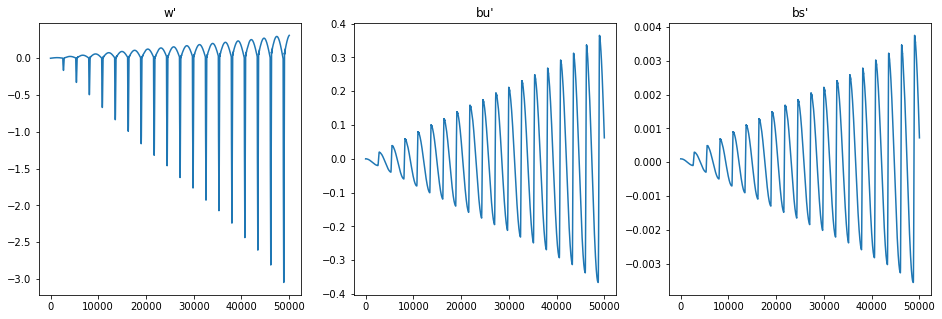

In [19]:
nrows = 1
ncols = 3
fig,ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16,5))
sens_subplots(wp, ax[0], "w'")
sens_subplots(bup, ax[1], "bu'")
sens_subplots(bsp, ax[2], "bs'")

### ADJ in E-norm

In [44]:
Cu = 1/Nu**2
Cs = 1/Ns**2
HuCu = Hu*Cu
HsCs = Hs*Cs

In [61]:
a_w = np.zeros(nt)
a_bu = np.zeros(nt)
a_bs = np.zeros(nt)

alpha = 0.01


#       w0d = 0.0001
#       w0 = 0.1
#       bs0d = 0.0001
#       bs0 = 0.1
#       bu0d = 0.0001
#       bu0 = 0.5
    
endt = nt#-5000
a_w[endt] = 0.0258656154338376 #wp[endt]
a_bu[endt] = -0.08322779465180113#bup[endt]
a_bs[endt] = -0.0007332779465180112#bsp[endt]

# for storage
ws = np.zeros(nt)
bus = np.zeros(nt)
bss = np.zeros(nt)

for t in range(endt-1,1,-1):
    if bs[t] > bu[t]:
        a_w[t-1] = a_w[t+1] - a_bs[t]*dt*2
    else:
        a_w[t-1] = a_w[t+1] - a_bu[t]*dt*2
    
    a_bu[t-1] = a_bu[t+1] + (Nu**2)*a_w[t]*dt*2#*HuCu[t-1]
    a_bs[t-1] = a_bs[t+1] + (Ns**2)*a_w[t]*dt*2#*HsCs[t-1]
    
# asselin filter 
#     a_bu[t] = a_bu[t] + alpha*(a_bu[t+1] - 2*a_bu[t] + a_bu[t-1])
#     a_bs[t] = a_bs[t] + alpha*(a_bs[t+1] - 2*a_bs[t] + a_bs[t-1])
#     a_w[t] = a_w[t] + alpha*(a_w[t+1] - 2*a_w[t] + a_w[t-1])


if bs[t] > bu[t]:
    a_w[t-1] = a_w[t] - a_bs[t]*dt
else:
    a_w[t-1] = a_w[t] - a_bu[t]*dt

a_bu[t-1] = a_bu[t] + (Nu**2)*a_w[t]*dt#*HuCu[t-1]
a_bs[t-1] = a_bs[t] + (Ns**2)*a_w[t]*dt#*HsCs[t-1]
    

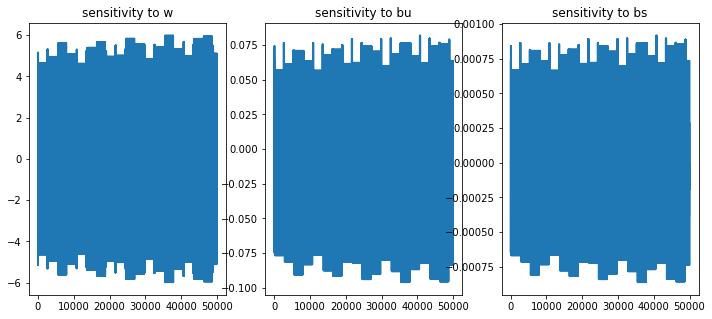

In [62]:
nrows = 1
ncols = 3
sk = 2
fig,ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12,5))
sens_subplots(a_w, ax[0], 'sensitivity to w')
sens_subplots(a_bu, ax[1], 'sensitivity to bu')
sens_subplots(a_bs, ax[2], 'sensitivity to bs')

In [20]:
a_w = np.zeros(nt)
a_bu = np.zeros(nt)
a_bs = np.zeros(nt)

alpha = 0.01


#       w0d = 0.0001
#       w0 = 0.1
#       bs0d = 0.0001
#       bs0 = 0.1
#       bu0d = 0.0001
#       bu0 = 0.5
    
endt = nt-1#-5000
a_w[endt] = 0.0258656154338376 #wp[endt]
a_bu[endt] = -0.08322779465180113#bup[endt]
a_bs[endt] = -0.0007332779465180112#bsp[endt]
print(endt)
# for storage
ws = np.zeros(nt)
bus = np.zeros(nt)
bss = np.zeros(nt)

# try the usual adjiont with tapenade code
for t in range(endt-1,2,-1):
    #print(t,t+1)
    a_bs[t-1] = a_bs[t+1] + a_bs[t-1]# = 0, omit
    a_bu[t-1] = a_bu[t+1] + a_bs[t-1]# = 0, omit
    a_w[t] = - Ns**2*a_bs[t+1]*2*dt - Nu**2*a_bu[t+1]*2*dt
    
    bss[t+1] = a_bs[t+1]
    bus[t+1] = a_bu[t+1]
    a_bs[t+1] = 0
    a_bu[t+1] = 0
    
    a_w[t-1] = a_w[t-1] + a_w[t-1] # = 0, omit
    if Hs[t] == 1:
        a_bu[t] = a_bu[t] + a_w[t+1]*2*dt
    else:
        a_bs[t] = a_bs[t] + a_w[t+1]*2*dt
    
    ws[t+1] = a_w[t+1]
    a_w[t+1] = 0

49999


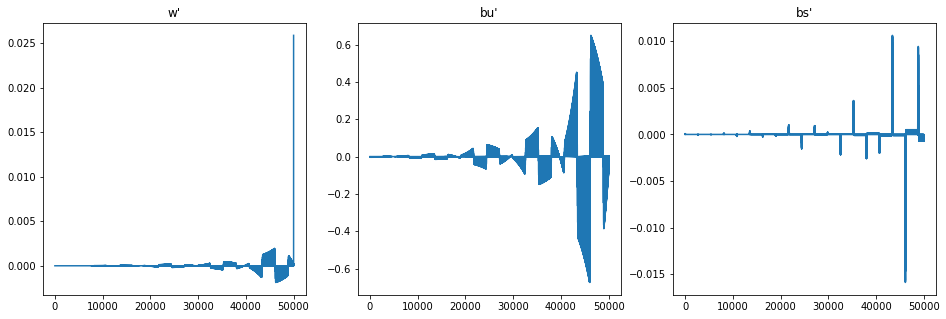

In [21]:
nrows = 1
ncols = 3
fig,ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16,5))
sens_subplots(ws, ax[0], "w'")
sens_subplots(bus, ax[1], "bu'")
sens_subplots(bss, ax[2], "bs'")

#### Add in perturbations to NLM

In [11]:
wpp = 1e-4
bupp = 1e-5
bspp = 1e-6

w[0] = 0.1+wpp
bu[0] = 0+bupp
bs[0] = 0+bspp
for t in range(nt-1):
    if bs[t] > bu[t]:
        w[t+1] = w[t] + bs[t]*dt
    else:
        w[t+1] = w[t] + bu[t]*dt
    
    bu[t+1] = bu[t] - (Nu**2)*w[t]*dt
    bs[t+1] = bs[t] - (Ns**2)*w[t]*dt
nlm_pert = np.array([w,bu,bs])

w[0] = 0.1
bu[0] = 0
bs[0] = 0
for t in range(nt-1):
    if bs[t] > bu[t]:
        w[t+1] = w[t] + bs[t]*dt
    else:
        w[t+1] = w[t] + bu[t]*dt
    
    bu[t+1] = bu[t] - (Nu**2)*w[t]*dt
    bs[t+1] = bs[t] - (Ns**2)*w[t]*dt
nlm_ctrl = np.array([w,bu,bs])

In [1]:
nlm_diff = nlm_pert - nlm_ctrl
nrows = 1
ncols = 3
fig,ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16,5))
sens_subplots(nlm_diff[0], ax[0], "Euler NLM w'")
sens_subplots(nlm_diff[1], ax[1], "NLM bu'")
sens_subplots(nlm_diff[2], ax[2], "NLM bs'")

NameError: name 'nlm_pert' is not defined

In [ ]:
def sens_subplots(var, ax, title):
    cs = ax.plot(var)
    ax.set_title(title)

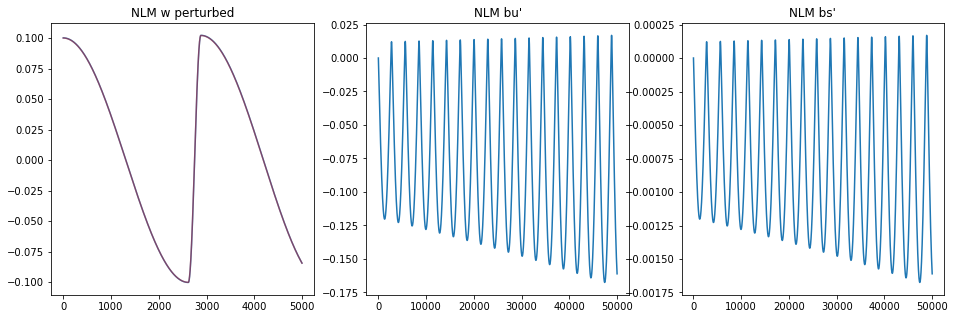

In [46]:
nrows = 1
ncols = 3
fig,ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16,5))
sens_subplots(nlm_pert[0][:5000], ax[0], "NLM w perturbed")
ax[0].plot(nlm_ctrl[0][:5000], color='r', alpha=0.4)
sens_subplots(nlm_pert[1], ax[1], "NLM bu'")
sens_subplots(nlm_pert[2], ax[2], "NLM bs'")

In [22]:
a = pd.read_csv('/home1/class/fall17/nchen67/fortran_c/fort.16', delim_whitespace=True, 
                header=None, names=['a_w', 'a_bu', 'a_bs'])
a_w = a.a_w.values[::-1]
a_bu = a.a_bu.values[::-1]
a_bs = a.a_bs.values[::-1]

In [25]:
a_w[-1], a_w[0], bs[0], bu[0]

(1.0, 0.447927058, 0.0, 0.0)

dR final = (-0.0021136518504991366, 0.0, 0.0)


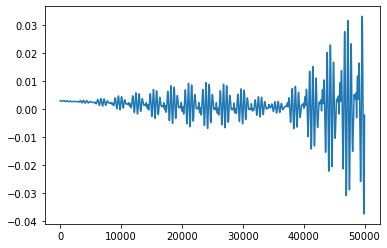

In [26]:
dR = tlm_pert[0]*a_w + tlm_pert[1]*a_bu + tlm_pert[2]*a_bs
plt.plot(dR)
print(f'dR final = {tlm_pert[0][-1]*a_w[-1], tlm_pert[1][-1]*a_bu[-1], tlm_pert[2][-1]*a_bs[-1]}')

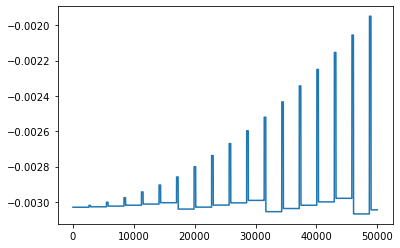

In [27]:
nlm_diff = nlm_ctrl - nlm_pert
dR = nlm_diff[0]*a_w + nlm_diff[1]*a_bu + nlm_diff[2]*a_bs
plt.plot(dR)

$<Lx'\cdot Lx'> = <L^T(Lx')\cdot x'>$

In [28]:
wt = tlm_pert[0][-1]
but = tlm_pert[1][-1]
bst = tlm_pert[2][-1]
wt, but, bst

(-0.0021136518504991366, 0.004576240138814008, 4.666240138814002e-05)

In [33]:
a = pd.read_csv('/home1/class/fall17/nchen67/fortran_c/fort.16', delim_whitespace=True, 
                header=None, names=['a_w', 'a_bu', 'a_bs'])
a_w = a.a_w.values[::-1]
a_bu = a.a_bu.values[::-1]
a_bs = a.a_bs.values[::-1]

In [35]:
#a_w[0]*wp[0] + a_bu[0]*bup[0] + a_bs[0]*bsp[0], wt**2 + but**2 + bst**2
#wp[0]= 1e-4  bup[0] = 1e-5 bsp[0] = 1e-6
wp[-1]*wp[-1], a_w[0]*wp[0]

(4.467524145118424e-06, -8.368575009999999e-07)

### ADJ in E-norm